<img src='http://hilpisch.com/tpq_logo.png' width="350px" align="right">

# Reinforcement Learning

&copy; Dr. Yves J. Hilpisch | The Python Quants GmbH

<a href="mailto:training@tpq.io">training@tpq.io</a> | https://cpf.tpq.io | [@dyjh](https://twitter.com/dyjh) | [YouTube](https://youtube.com/@dyjh)

<img src="https://certificate.tpq.io/rl4finance_cover_bw.png" width="300px" align="left">

## Reinforcement Learning

In [1]:
import os
import math
import random
import numpy as np
import pandas as pd
from pylab import plt, mpl
plt.style.use('seaborn-v0_8')
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['figure.dpi'] = 300
np.set_printoptions(precision=4, suppress=True)
os.environ['PYTHONHASHSEED'] = '0'
%config InlineBackend.figure_format = 'svg'

## `CartPole` Environment 

See https://gymnasium.farama.org/environments/classic_control/cart_pole/.

In [2]:
import gymnasium as gym

In [23]:
env = gym.make('CartPole-v1')  # try to balance pole on cart
# 4 arguments to do so: 0 - cart position, 1 - cart velocity, 2 - pole angle, 3 - pole angular velocity

In [4]:
env.action_space.seed(100)

[100]

In [5]:
env.observation_space

Box([-4.8000e+00 -3.4028e+38 -4.1888e-01 -3.4028e+38], [4.8000e+00 3.4028e+38 4.1888e-01 3.4028e+38], (4,), float32)

In [6]:
env.observation_space.low.astype(np.float32)  # minimum values that can be achieved

array([-4.8000e+00, -3.4028e+38, -4.1888e-01, -3.4028e+38], dtype=float32)

In [22]:
env.observation_space.high.astype(np.float32)  # maximum values that can be achieved

array([4.8000e+00, 3.4028e+38, 4.1888e-01, 3.4028e+38], dtype=float32)

In [8]:
state, info = env.reset(seed=100)

In [9]:
state

array([ 0.0335,  0.0097, -0.0211, -0.0457], dtype=float32)

In [21]:
env.action_space  # action space has 2 directions for the cart to go to, left or right

Discrete(2)

In [11]:
env.action_space.n

2

In [12]:
env.action_space.sample()  # sample from the action space of going either left or right

1

In [13]:
for a in range(10):
    print(env.action_space.sample(), end=' ')

1 0 1 0 0 0 0 1 1 1 

In [14]:
a = env.action_space.sample()
a

1

In [15]:
env.step(a)

(array([ 0.0337,  0.2051, -0.022 , -0.345 ], dtype=float32),
 1.0,
 False,
 False,
 {})

In [16]:
state, reward, done, trunc, info = env.step(a)
state, reward, done, trunc, info

(array([ 0.0378,  0.4005, -0.0289, -0.6445], dtype=float32),
 1.0,
 False,
 False,
 {})

In [17]:
env.reset(seed=100)
for e in range(1, 200):
    a = env.action_space.sample()  # random agent
    state, reward, done, trunc, info = env.step(a)
    print(f'step={e:2d} | state={state} | action={a} | reward={reward}')
    if done and (e + 1) < 200:
        print('*** FAILED ***')
        break

step= 1 | state=[ 0.0337 -0.1852 -0.022   0.2402] | action=0 | reward=1.0
step= 2 | state=[ 0.03    0.0103 -0.0172 -0.0593] | action=1 | reward=1.0
step= 3 | state=[ 0.0302  0.2056 -0.0184 -0.3574] | action=1 | reward=1.0
step= 4 | state=[ 0.0343  0.401  -0.0256 -0.6558] | action=1 | reward=1.0
step= 5 | state=[ 0.0423  0.2063 -0.0387 -0.3713] | action=0 | reward=1.0
step= 6 | state=[ 0.0465  0.4019 -0.0461 -0.6759] | action=1 | reward=1.0
step= 7 | state=[ 0.0545  0.5976 -0.0596 -0.9827] | action=1 | reward=1.0
step= 8 | state=[ 0.0664  0.4034 -0.0793 -0.7094] | action=0 | reward=1.0
step= 9 | state=[ 0.0745  0.5995 -0.0935 -1.0259] | action=1 | reward=1.0
step=10 | state=[ 0.0865  0.7957 -0.114  -1.3464] | action=1 | reward=1.0
step=11 | state=[ 0.1024  0.9921 -0.1409 -1.6725] | action=1 | reward=1.0
step=12 | state=[ 0.1223  0.7988 -0.1744 -1.4268] | action=0 | reward=1.0
step=13 | state=[ 0.1382  0.6063 -0.2029 -1.1933] | action=0 | reward=1.0
step=14 | state=[ 0.1504  0.8033 -0.22

In [24]:
done
# random agent usually fails within 10-20 steps since the agent has absolutley no intelligence, completely random action

True

## Dimensionality Reduction

See http://kvfrans.com/simple-algoritms-for-solving-cartpole/.

In [ ]:
np.random.seed(100)

In [25]:
weights = np.random.random(4) * 2 - 1  # take 4 rantom weights

In [26]:
weights

array([-0.5408, -0.8937,  0.7839, -0.8702])

In [27]:
state, info = env.reset(seed=100)

In [28]:
state, info

(array([ 0.0335,  0.0097, -0.0211, -0.0457], dtype=float32), {})

In [43]:
s = np.dot(state, weights)
s

-0.0035247363518851015

## Action Rule

In [44]:
# create very basic rule depending on dot(state, weights)
if s < 0:
    a = 0
else:
    a = 1

In [45]:
a

0

## Total Reward per Episode

In [46]:
def run_episode(env, weights):  
    state, info = env.reset()
    treward = 0
    for _ in range(475):
        s = np.dot(state, weights)
        a = 0 if s < 0 else 1  # above action rule
        state, reward, done, trunc, info = env.step(a)
        treward += reward
        if done:
            break  # break if we failed
    return treward

In [54]:
run_episode(env, weights)  # not a good result still ...

475.0

## Simple Learning 

In [55]:
def set_seeds(seed=100):
    random.seed(seed)
    np.random.seed(seed)

In [56]:
set_seeds()
num_episodes = 100

In [57]:
besttreward = 0
for e in range(1, num_episodes + 1):
    weights = np.random.rand(4) * 2 - 1
    treward = run_episode(env, weights)
    if treward > besttreward:
        besttreward = treward
        bestweights = weights
        if treward == 475:
            print(f'SUCCESS | episode={e}')
            break
        print(f'UPDATE  | episode={e}')

UPDATE  | episode=1
UPDATE  | episode=4
UPDATE  | episode=13
SUCCESS | episode=35


In [58]:
weights

array([0.1647, 0.9818, 0.9853, 0.9862])

## Testing the Results

In [59]:
res = []
for _ in range(100):
    treward = run_episode(env, weights)
    res.append(treward)
res[:10]

[475.0, 475.0, 475.0, 475.0, 475.0, 475.0, 475.0, 475.0, 475.0, 475.0]

In [68]:
sum(res) / len(res)
# all 100 results are actually 475 which is optimal!
# so we have found the optimal weights (without ML, just simple sampling)

475.0

## `TensorFlow/Keras`

In [61]:
import warnings as w
w.simplefilter('ignore')

In [62]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [63]:
import tensorflow as tf

In [64]:
tf.__version__

'2.16.1'

In [87]:
# !pip install tf_keras

In [124]:
import os
os.environ['TF_USE_LEGACY_KERAS'] = 'True'

from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()

import random
import numpy as np
import tensorflow as tf
from tf_keras.layers import Dense
from tf_keras.models import Sequential
from tf_keras.optimizers.legacy import Adam
from sklearn.metrics import accuracy_score

In [125]:
def set_seeds(seed=100):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    env.action_space.seed(seed)

## Q-Learning

See https://keon.io/deep-q-learning/

In [117]:
from collections import deque

In [158]:
class DQLAgent:
    def __init__(self, gamma=0.95, hu=24, opt=Adam, lr=0.001, finish=False):
        self.finish = finish
        self.epsilon = 1.0  # starting value for epsilon
        self.epsilon_min = 0.1
        self.epsilon_decay = 0.9975
        self.gamma = gamma
        self.batch_size = 32
        self.max_treward = 0
        self.averages = list()
        self.memory = deque(maxlen=2000)  # FIFO: lose oldest memory, like humans (remember fresher events more than older)
        self.osn = env.observation_space.shape[0]
        self.model = self._build_model(hu, opt, lr)
        
    def _build_model(self, hu, opt, lr):
        model = Sequential()
        model.add(Dense(hu, input_dim=self.osn, activation='relu'))
        model.add(Dense(hu, activation='relu'))
        model.add(Dense(env.action_space.n, activation='linear'))
        model.compile(loss='mse', optimizer=opt(learning_rate=lr))
        return model
        
    def act(self, state):
        if random.random() <= self.epsilon:  # exploration (in the beginning epsilon = 100%, so always explore)
            return env.action_space.sample()
        action = self.model.predict(state)[0]  # exploitation
        return np.argmax(action)  # pick action with max reward: exploit
    
    def replay(self):
        batch = random.sample(self.memory, self.batch_size)
        for state, action, reward, next_state, done in batch:
            if not done:
                reward += self.gamma * np.amax(self.model.predict(next_state)[0])
                # immediate reward + discounted next increment reward
            target = self.model.predict(state)
            target[0, action] = reward
            self.model.fit(state, target, epochs=1, verbose=False)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay  # decrease epsilon
    
    def learn(self, episodes):
        trewards = []
        for e in range(1, episodes + 1):
            state, info = env.reset()
            state = np.reshape(state, [1, self.osn])
            for _ in range(5000):
                action = self.act(state)
                next_state, reward, done, trunc, info = env.step(action)  # take next action
                next_state = np.reshape(next_state, [1, self.osn])
                self.memory.append([state, action, reward, next_state, done])
                state = next_state
                if done:
                    # housekeeping here: take some statistics + wrap up
                    treward = _ + 1
                    trewards.append(treward)
                    av = sum(trewards[-25:]) / 25
                    self.averages.append(av)
                    self.max_treward = max(self.max_treward, treward)
                    templ = 'episode: {:4d}/{} | treward: {:4d} | av: {:6.1f} | max: {:4d}'
                    print(templ.format(e, episodes, treward, av, self.max_treward), end='\r')
                    break
            if av > 450 and self.finish:
                break
            if len(self.memory) > self.batch_size:
                self.replay()
        print()
    
    def test(self, episodes):
        trewards = []
        for e in range(1, episodes + 1):
            state, info = env.reset()
            for _ in range(5001):
                state = np.reshape(state, [1, self.osn])
                action = np.argmax(self.model.predict(state)[0])  # no exploration, just exploitation
                next_state, reward, done, trunc, info = env.step(action)
                state = next_state
                if done:
                    treward = _ + 1
                    trewards.append(treward)
                    print('episode: {:4d}/{} | treward: {:4d}'.format(e, episodes, treward), end='\r')
                    break
        return trewards

In [131]:
episodes = 1000

In [132]:
set_seeds(100)

In [133]:
agent = DQLAgent(finish=True)

In [134]:
%time agent.learn(episodes)



episode: 1000/1000 | treward:   39 | av:   68.9 | max:  816
CPU times: total: 1min 4s
Wall time: 7min 12s


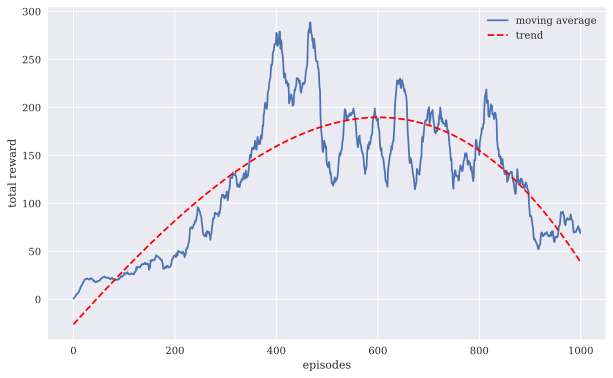

In [135]:
plt.figure(figsize=(10, 6))
x = range(len(agent.averages))
y = np.polyval(np.polyfit(x, agent.averages, deg=3), x)
plt.plot(agent.averages, label='moving average')
plt.plot(x, y, 'r--', label='trend')
plt.xlabel('episodes')
plt.ylabel('total reward')
plt.legend();

Actually, the agent improves continuously until around 600-something-th episode and then actually starts to worsen again - the reward in the very end is actually not even that good in the end, even though some collected rewards in the middle were quite high (around 300).

In [136]:
trewards = agent.test(50)

In [137]:
sum(trewards) / len(trewards)

62.52

## Finance Environment

In [148]:
class ObservationSpace:
    def __init__(self, n):
        self.shape = (n,)

In [149]:
class ActionSpace:
    def __init__(self, n):
        self.n = n

    def seed(self, seed):
        random.seed(seed)

    def sample(self):
        return random.randint(0, self.n - 1)

In [151]:
class Finance:
    url = 'https://certificate.tpq.io/rl4finance.csv'

    def __init__(self, symbol, features, min_accuracy=0.475):
        self.symbol = symbol
        self.features = features
        self.min_accuracy = min_accuracy
        self.observation_space = ObservationSpace(len(features))
        self.osn = self.observation_space.shape[0]
        self.action_space = ActionSpace(2)
        self.actions = []
        self._get_data()
        self._prepare_data()

    def _get_data(self):
        """Fetches data from the given URL."""
        self.raw = pd.read_csv(self.url, index_col=0, parse_dates=True)

    def _prepare_data(self):
        """Prepares and normalizes the data for use in the environment."""
        self.data = pd.DataFrame(self.raw[self.symbol]).dropna()
        self.data['r'] = np.log(self.data / self.data.shift(1))
        self.data.dropna(inplace=True)
        self.data_ = (self.data - self.data.mean()) / self.data.std()
        self.data['d'] = np.where(self.data['r'] > 0, 1, 0)

    def _get_state(self):
        """Returns the current state."""
        return self.data_[self.features].iloc[self.bar - self.osn:self.bar].values

    def seed(self, seed=None):
        """Sets the seed for random number generation."""
        random.seed(seed)

    def reset(self):
        """Resets the environment to the initial state."""
        self.treward = 0
        self.accuracy = 0
        self.bar = self.osn
        state = self.data_[self.features].iloc[self.bar - self.osn:self.bar]
        return state.values, {}

    def step(self, action):
        """Takes an action and returns the next state, reward, done, truncated, and info."""
        self.actions.append(action)
        correct = action == self.data['d'].iloc[self.bar]  # check if action (prediction on market) is correct or not
        reward = 1 if correct else 0
        self.treward += reward
        self.bar += 1
        self.accuracy = self.treward / (self.bar - self.osn)

        done = False
        if self.bar >= len(self.data):
            done = True
        elif reward == 0 and self.accuracy < self.min_accuracy and self.bar > self.osn + 20:
            done = True

        state = self._get_state()
        info = {}
        return state, reward, done, False, info

In [152]:
env = Finance('EUR=', 'r')

In [153]:
env.reset()

(array([-1.1913]), {})

In [154]:
a = env.action_space.sample()
a

0

In [155]:
env.step(a)

(array([-1.2134]), 1, False, False, {})

In [156]:
env.min_accuracy = 0.5

In [160]:
set_seeds(100)
agent = DQLAgent(gamma=0.5, opt=Adam, lr=0.0005)

In [161]:
episodes = 250

In [162]:
%time agent.learn(episodes)

episode:  250/250 | treward:   21 | av:  672.4 | max: 2606
CPU times: total: 21.2 s
Wall time: 2min 20s


In [169]:
agent.epsilon  # after 250: still more exploration than exploitation!

0.5348427211156283

In [164]:
env.min_accuracy

0.5

In [165]:
env.actions = list()

In [170]:
agent.test(7)  # test yields always the same result here
# (= fixed/same data set & fixed/same policy. Trained + tested on same data set all 7 times)

[2606, 2606, 2606, 2606, 2606, 2606, 2606]

In [171]:
env.accuracy

0.5072908672294705

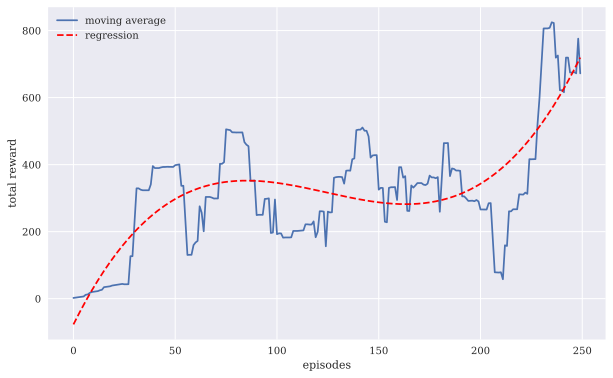

In [172]:
plt.figure(figsize=(10, 6))
x = range(len(agent.averages))
y = np.polyval(np.polyfit(x, agent.averages, deg=3), x)
plt.plot(agent.averages, label='moving average')
plt.plot(x, y, 'r--', label='regression')
plt.xlabel('episodes')
plt.ylabel('total reward')
plt.legend();

Over our 250 episodes, it seems that the agent seems to improve towards the end and the reward collected in the end is actually quite good.

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br><br>

 <a href="mailto:training@tpq.io">training@tpq.io</a> | https://cpf.tpq.io | [@dyjh](http://twitter.com/dyjh) | [YouTube](http://youtube.com/@dyjh)